In [1]:
# %load init.py
import IPython.core.display as di
from IPython.display import HTML

di.display_html('''<script>
  function code_toggle(e) {
    while (!e.closest(".nboutput").previousElementSibling.classList.contains("nbinput")) {
      e = e.closest(".nboutput").previousElementSibling;
    }
    var target = e.closest(".nboutput").previousElementSibling;
    if (target.getAttribute("style") == "" || target.getAttribute("style") == null) {
      target.style.display = "none";
    }
    else {
      target.style.removeProperty("display");
    }
  }
  $(document).ready(function() {
    var code_blocks = document.getElementsByClassName('nbinput docutils container');
    for (var i = 0, len = code_blocks.length; i < len; ++i) {
      if (code_blocks[i].innerHTML.indexOf("toggle") !== -1) {
        code_blocks[i].style.display = "none";
      }
    }
    //$('div.nbinput').hide();
  });
  $(document).ready(code_toggle);
</script>''', raw=True)

def toggle():
    html = """
        <a href="#" onclick="code_toggle(this); return false;">show/hide code</a>
    """
    return HTML(html)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import *
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df_house = pd.read_csv('https://raw.githubusercontent.com/ming-zhao/Business-Analytics/master/data/House_Sales.csv', 
                 parse_dates=['month'], names=['month', 'house'], header=0, index_col='month')
df_house['year'] = [d.year for d in df_house.index]
df_house['month'] = [d.strftime('%b') for d in df_house.index]

df_drink = pd.read_csv('https://raw.githubusercontent.com/ming-zhao/Business-Analytics/master/data/Soft_Drink_Sales.csv', 
                 parse_dates=['quarter'], names=['quarter', 'drink'], header=0)
df_drink['quarter'] = [pd.to_datetime(''.join(df_drink['quarter'].str.split('-')[i][-1::-1])) 
                       + pd.offsets.QuarterEnd(0) for i in df_drink.index]
df_drink = df_drink.set_index('quarter')
# df_drink[['q','year']]=df_drink['quarter'].str.split('-',expand=True)
df_drink['year'] = [d.year for d in df_drink.index]
df_drink['quarter'] = ['Q'+str(d.month//3) for d in df_drink.index]

noise = pd.Series(np.random.randn(200))
def randomwalk(drift):
    return pd.Series(np.cumsum(np.random.uniform(-1,1,(200,1)) + drift*np.ones((200,1))))

toggle()

HTML(value='\n        <a href="#" onclick="code_toggle(this); return false;">show/hide code</a>\n    ')

## Time Series Data

Time series is a sequence of observations recorded at regular time intervals with many applications such as in demand and sales, number of visitors to a website, stock price, etc. In this section, we focus on two time series datasets that one is the US houses sales and the other is the soft drink sales.

### Read and plot data

The python package `pandas` is used to read `.cvs` data file. The first 5 rows are shown as below.

In [2]:
df_house.head()

,house,year,month
month,,,
1991-01-01,401,1991,Jan
1991-02-01,482,1991,Feb
1991-03-01,507,1991,Mar
1991-04-01,508,1991,Apr
1991-05-01,517,1991,May


In [3]:
df_drink.head()

,drink,year,quarter
quarter,,,
2001-03-31,1807.37,2001,Q1
2001-06-30,2355.32,2001,Q2
2001-09-30,2591.83,2001,Q3
2001-12-31,2236.39,2001,Q4
2002-03-31,1549.14,2002,Q1


There are univariate and multivariate time series where
- A univariate time series is a series with a single time-dependent variable, and
- A Multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables. This dependency is used for forecasting future values.

Our datasets are univariate time series. Time series data can be thought of as special cases of panel data. Panel data (or longitudinal data) also involves measurements over time. The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods. 

Now, We plot the time series data

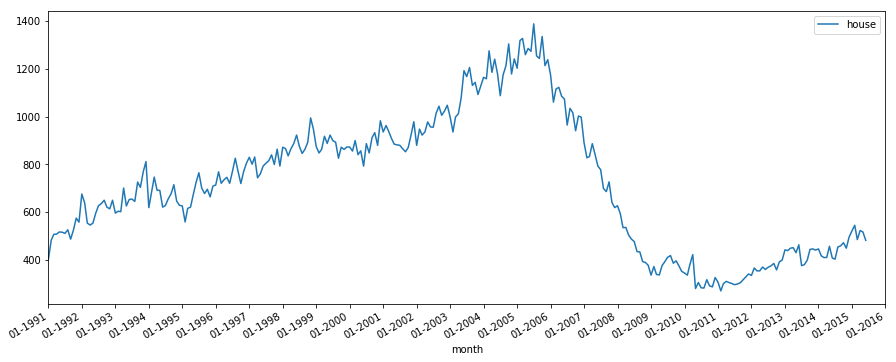

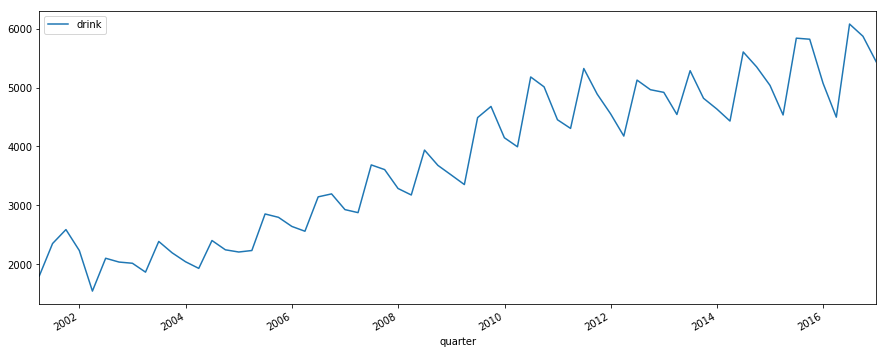

HTML(value='\n        <a href="#" onclick="code_toggle(this); return false;">show/hide code</a>\n    ')

In [4]:
import matplotlib.dates as mdates

ax = df_house.plot(y="house", figsize=(15,6), x_compat=True)
ax.set_xlim(pd.Timestamp('1991-01-01'), pd.Timestamp('2016-01-01'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.show()

ax = df_drink.plot(y="drink", figsize=(15,6), x_compat=True)
plt.show()
toggle()

### White noise

A time series is white noise if the observations are independent and identically distributed with a mean of zero. This means that all observations have the same variance and each value has a zero correlation with all other values in the series. White noise is an important concept in time series analysis and forecasting because:
- Predictability: if the time series is white noise, then, by definition, it is random. We cannot reasonably model it and make predictions.
- Model diagnostics: the series of errors from a time series forecast model should ideally be white noise.

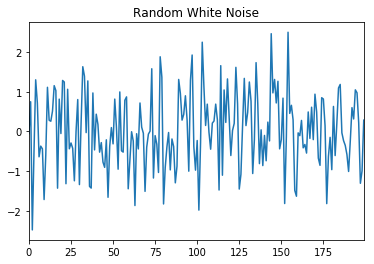

HTML(value='\n        <a href="#" onclick="code_toggle(this); return false;">show/hide code</a>\n    ')

In [5]:
noise.plot(title='Random White Noise')
plt.show()
toggle()

### Random walk

The series itself is not random. However, its differences - that is, the changes from one period to the next - are random. The random walk model is

$$Y_t = Y_{t-1} + \mu + e_t$$

and the difference form of random walk model is

$$DY_{t} = Y_t - Y_{t-1} = \mu + e_t$$

where $\mu$ is the drift. Apparently, the series tends to trend upward if $\mu > 0$ or downward if $\mu < 0$.

In [6]:
def update(drift):
    np.random.seed(123)
    randomwalk(drift).plot(title='Random Walk')

interact(update, drift=widgets.FloatSlider(min=-0.1,max=0.1,step=0.01,value=0,description='Drift:'))
plt.show()

toggle()

interactive(children=(FloatSlider(value=0.0, description='Drift:', max=0.1, min=-0.1, step=0.01), Output()), _…

HTML(value='\n        <a href="#" onclick="code_toggle(this); return false;">show/hide code</a>\n    ')

### Seasonal plot of a time series

The datasets are either a monthly or quarterly time series. They may follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This allows us to compare the year-wise patterns side-by-side.

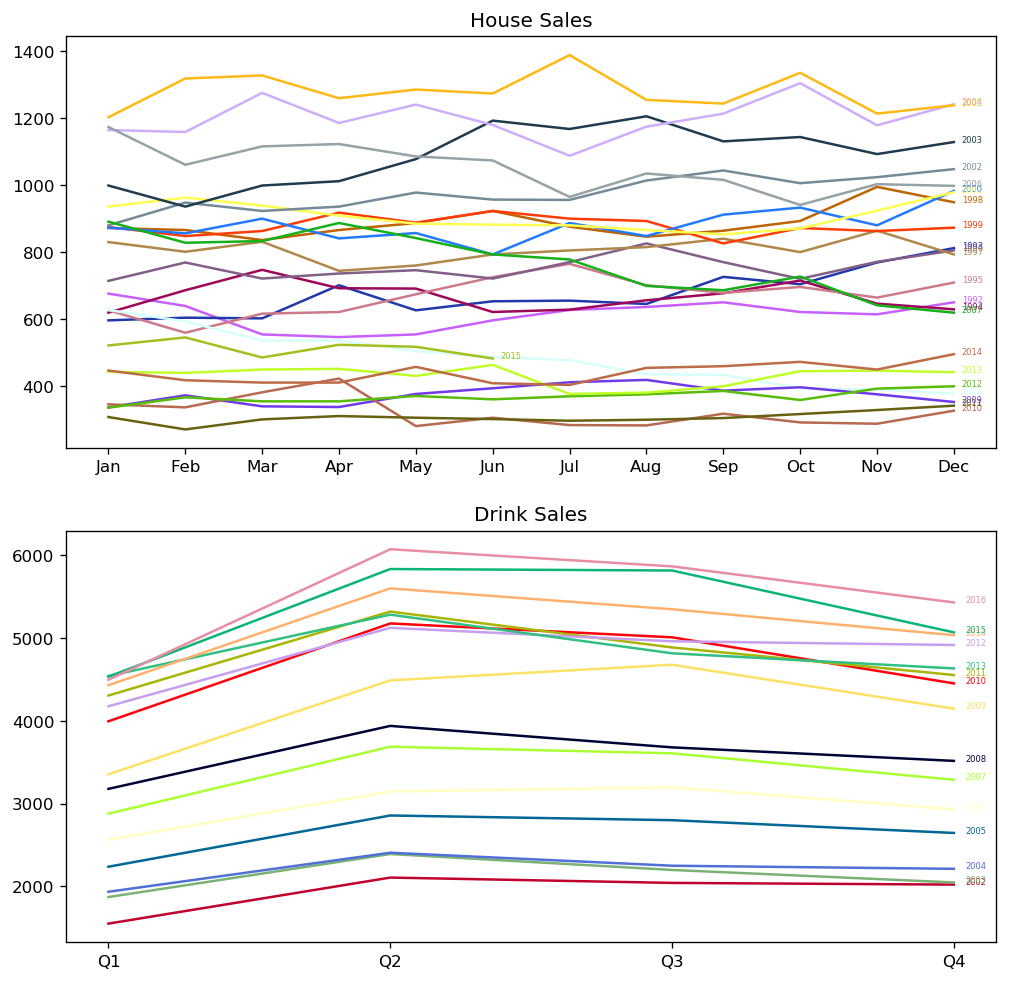

HTML(value='\n        <a href="#" onclick="code_toggle(this); return false;">show/hide code</a>\n    ')

In [7]:
import matplotlib as mlp
import numpy as np

np.random.seed(100)
years = df_house['year'].unique()
mycolors = np.random.choice(list(mlp.colors.XKCD_COLORS.keys()), len(years), replace=False)

plt.subplots(2, 1, figsize=(10,10), dpi=120)
# plt.figure(figsize=(8,5), dpi=120)
plt.subplot(2, 1, 1)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'house', data=df_house.loc[df_house.year==y, :], color=mycolors[i], label=y)
        plt.text(df_house.loc[df_house.year==y, :].shape[0]-.9, 
                 df_house.loc[df_house.year==y, 'house'][-1:].values[0], y, color=mycolors[i], fontsize=5)
plt.title('House Sales')

years = df_drink['year'].unique()
mycolors = np.random.choice(list(mlp.colors.XKCD_COLORS.keys()), len(years), replace=False)

# plt.figure(figsize=(8,5), dpi= 120)
plt.subplot(2, 1, 2)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('quarter', 'drink', data=df_drink.loc[df_drink.year==y, :], color=mycolors[i], label=y)
        plt.text(df_drink.loc[df_drink.year==y, :].shape[0]-.96, 
                 df_drink.loc[df_drink.year==y, 'drink'][-1:].values[0], y, color=mycolors[i], fontsize=5)

plt.title('Drink Sales')        
plt.show()
toggle()

For house sales, we do not see a clear repetitive pattern in each year. It is also difficult to identify a clear trend among years.

For drink sales, there is a clear pattern repeating every year. It shows a steep increase in drink sales every 2nd quarter. Then, it is falling slightly in the 3rd quarter and so on. As years progress, the drink sales increase overall.

### Boxplot of month-wise (seasonal) and year-wise (trend) distribution

We can visualize the trend and how it varies each year in a year-wise or month-wise boxplot for house sales, as well as quarter-wise boxplot for drink sales.

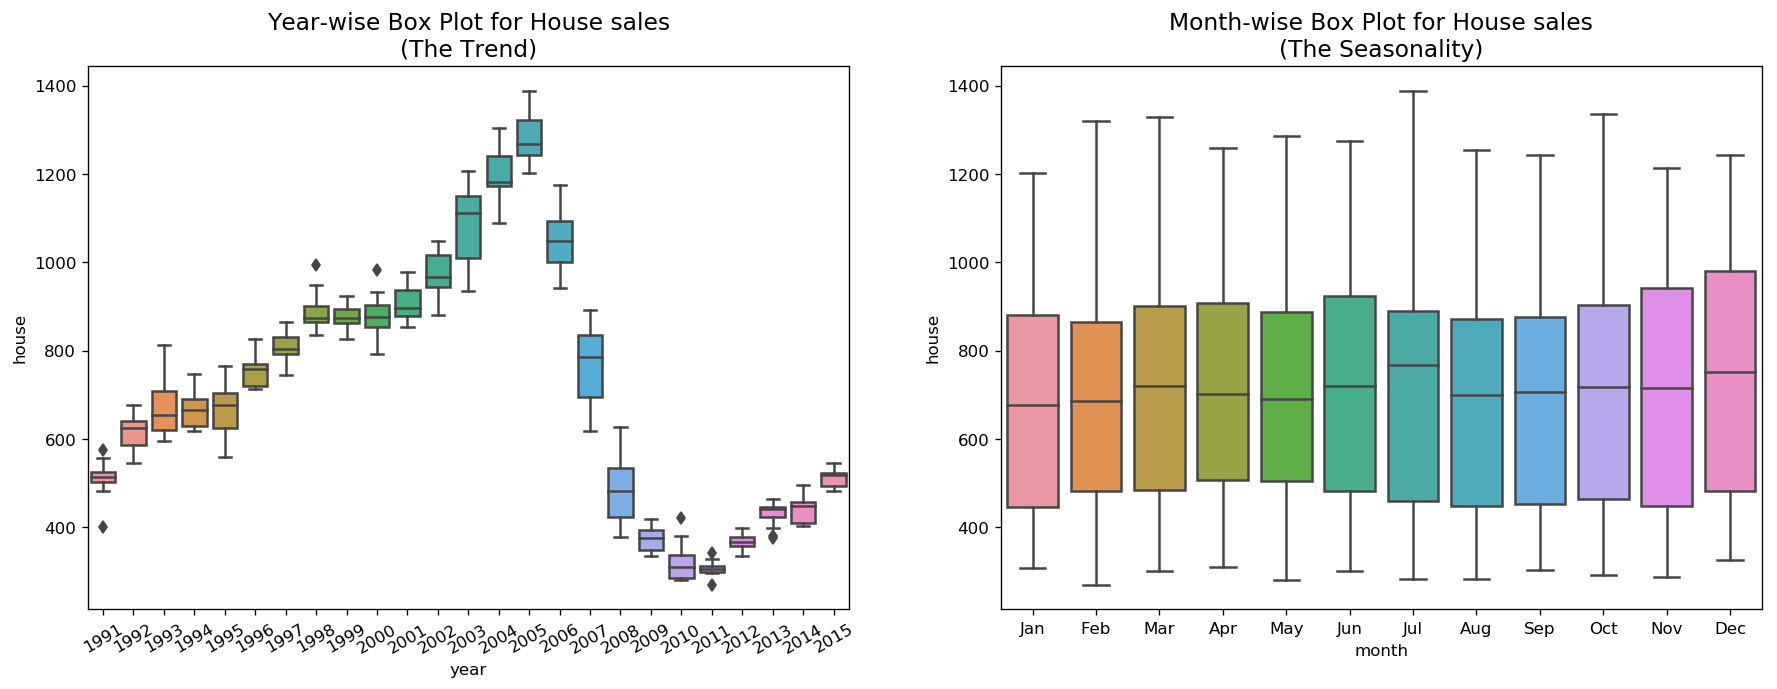

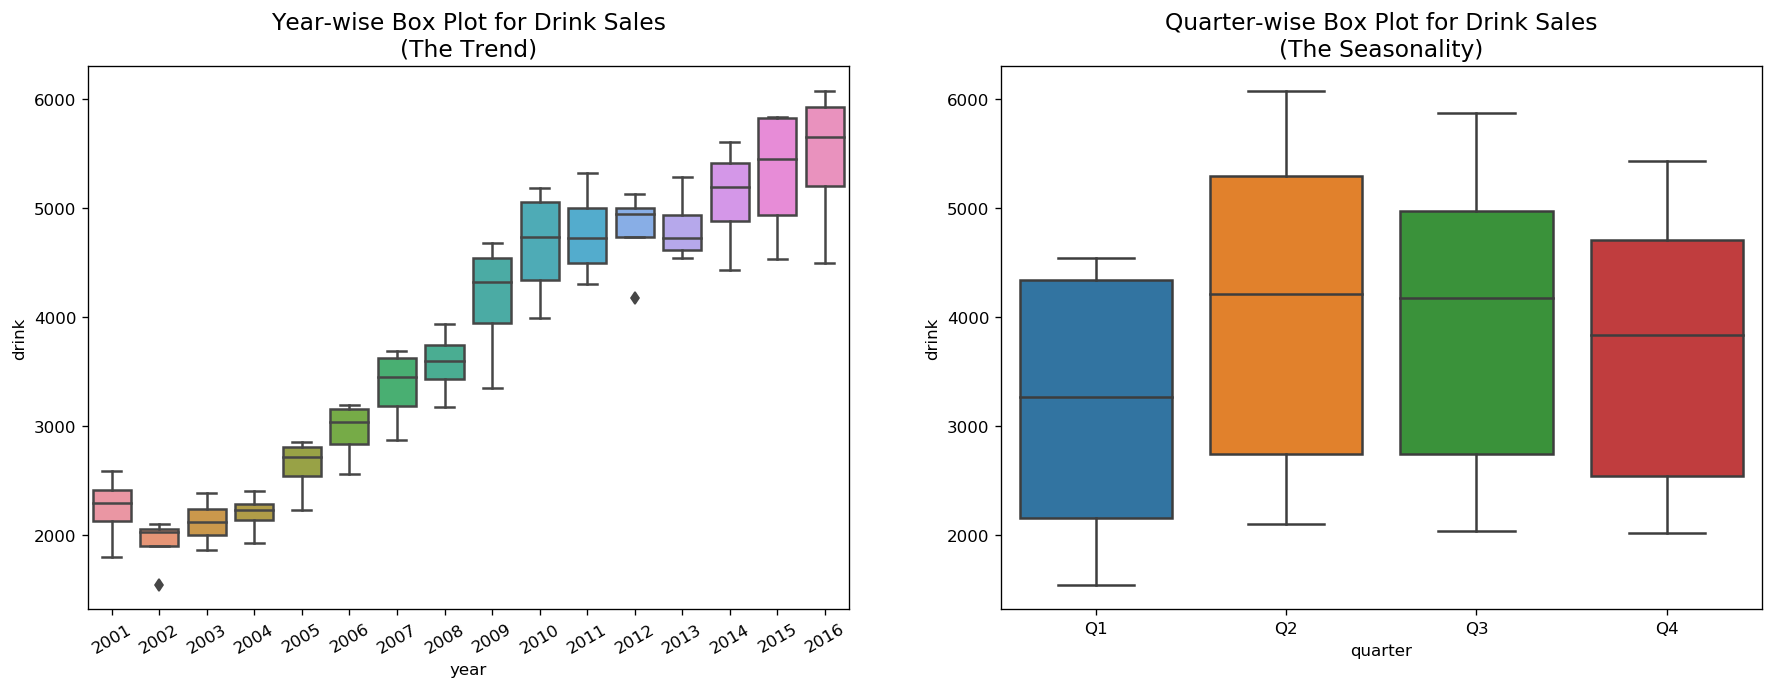

HTML(value='\n        <a href="#" onclick="code_toggle(this); return false;">show/hide code</a>\n    ')

In [8]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, 2, figsize=(18,6), dpi=120)
sns.boxplot(x='year', y='house', data=df_house, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
sns.boxplot(x='month', y='house', data=df_house)

axes[0].set_title('Year-wise Box Plot for House sales\n(The Trend)', fontsize=14); 
axes[1].set_title('Month-wise Box Plot for House sales\n(The Seasonality)', fontsize=14)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18,6), dpi=120)
sns.boxplot(x='year', y='drink', data=df_drink, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
sns.boxplot(x='quarter', y='drink', data=df_drink)

axes[0].set_title('Year-wise Box Plot for Drink Sales\n(The Trend)', fontsize=14); 
axes[1].set_title('Quarter-wise Box Plot for Drink Sales\n(The Seasonality)', fontsize=14)
plt.show()
toggle()

### Smoothen a time series

Smoothening of a time series may be useful in:
- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better

**Moving average smoothing** is certainly the most common smoothening method.

In [9]:
def update(span = 3):
    fig, ax = plt.subplots(1, 1, figsize = (12,6))
    df_ma = df_house.house.rolling(span).mean()
    df_ma.plot(ax=ax, title='Moving Average ({})'.format(span), c='red')
    df_house.house.plot(ax=ax, c='teal')
    ax.legend(labels=['Moving Average', 'Original'])
    fig.canvas.draw()
    

interact(update, span=widgets.IntSlider(min=3,max=30,step=3,value=6,description='Span:'))
plt.show()

toggle()

interactive(children=(IntSlider(value=6, description='Span:', max=30, min=3, step=3), Output()), _dom_classes=…

HTML(value='\n        <a href="#" onclick="code_toggle(this); return false;">show/hide code</a>\n    ')

There are other methods such as LOESS smoothing (LOcalized regrESSion) and LOWESS smoothing (LOcally Weighted regrESSion).

LOESS fits multiple regressions in the local neighborhood of each point. It is implemented in the `statsmodels` package, where we can control the degree of smoothing using `frac` argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

In [10]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def update(frac=0.05):
    fig, ax = plt.subplots(1, 1, figsize = (12,6))
    df_loess= pd.DataFrame(lowess(df_house.house, np.arange(len(df_house.house)), frac=frac)[:, 1], 
                          index=df_house.index, columns=['value'])
    df_loess['value'].plot(ax=ax, title='Loess Smoothed {}%'.format(frac*100), c='red')
    df_house.house.plot(ax=ax, c='teal')
    ax.legend(labels=['Lowess Smooth', 'Original'])
    fig.canvas.draw()

interact(update, frac=widgets.FloatSlider(min=0.05,max=0.3,step=0.05,value=0.05,description='Frac:'))
plt.show()

interactive(children=(FloatSlider(value=0.05, description='Frac:', max=0.3, min=0.05, step=0.05), Output()), _…